In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.transforms import functional as F
import numpy as np
from PIL import Image
import os

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Dataset klasörü oluşturma

In [ ]:
import os
import shutil

if os.path.exists('dataset'):
    shutil.rmtree('dataset')
    print("Directory 'dataset' removed successfully")
else:
    print("Directory 'dataset' does not exist")


Directory 'dataset' does not exist


In [ ]:
from sklearn.model_selection import train_test_split

celik_resimleri_klasoru = '/content/drive/My Drive/Goruntu_Isleme/Celik/images_perlitv2'
celik_etiketleri_klasoru = '/content/drive/My Drive/Goruntu_Isleme/Celik/labels_perlitv2'

celik_resimleri = os.listdir(celik_resimleri_klasoru)
celik_etiketleri = os.listdir(celik_etiketleri_klasoru)

print(f"Görseller klasörünüdeki dosya sayısı: {len(celik_resimleri)}")
print(f"Etiketler klasörünüdeki dosya sayısı: {len(celik_etiketleri)}")

# "dataset" ana klasörünü oluştur
dataset_dir = '/content/dataset'
os.makedirs(os.path.join(dataset_dir, 'images/train'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'images/val'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'labels/train'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'labels/val'), exist_ok=True)

# Görüntüleri ve etiketleri eşleştir
image_label_pairs = []
for img in celik_resimleri:
    if img.lower().endswith(('.png', '.jpg', '.jpeg')):
        label_name = os.path.splitext(img)[0] + '.json'
        if label_name in celik_etiketleri:
            image_label_pairs.append((img, label_name))
        else:
            print(f"Eşleşmeyen görüntü: {img} için etiket bulunamadı.")

# Eşleşen çiftlerin toplamını yazdır
print(f"Toplam {len(image_label_pairs)} resim-etiket çiftleri bulundu.")
print("Eşleşen çiftler:")
for pair in image_label_pairs:
    print(pair)

# Görüntüleri eğitim ve doğrulama setlerine böl
train_images, val_images = train_test_split(image_label_pairs, test_size=0.5, random_state=42)

def save_as_png(src_path, dest_path):
    image = Image.open(src_path).convert("RGB")
    png_path = os.path.splitext(dest_path)[0] + ".png"
    image.save(png_path, "PNG")
    return png_path

for img, lbl in train_images:
    img_path = os.path.join(celik_resimleri_klasoru, img)
    png_path = os.path.join(dataset_dir, 'images/train', os.path.splitext(img)[0] + '.png')
    save_as_png(img_path, png_path)
    shutil.copy(os.path.join(celik_etiketleri_klasoru, lbl), os.path.join(dataset_dir, 'labels/train', lbl))

for img, lbl in val_images:
    img_path = os.path.join(celik_resimleri_klasoru, img)
    png_path = os.path.join(dataset_dir, 'images/val', os.path.splitext(img)[0] + '.png')
    save_as_png(img_path, png_path)
    shutil.copy(os.path.join(celik_etiketleri_klasoru, lbl), os.path.join(dataset_dir, 'labels/val', lbl))

print(f"train klasöründe {len(train_images)} resim ve etiket dosyası kopyalandı.")
print(f"val klasöründe {len(val_images)} resim ve etiket dosyası kopyalandı.")


Görseller klasörünüdeki dosya sayısı: 13
Etiketler klasörünüdeki dosya sayısı: 13
Toplam 13 resim-etiket çiftleri bulundu.
Eşleşen çiftler:
('perlit_6.jpg', 'perlit_6.json')
('perlit_10.png', 'perlit_10.json')
('perlit_1.png', 'perlit_1.json')
('perlit_2.png', 'perlit_2.json')
('perlit_3.png', 'perlit_3.json')
('perlit_4.png', 'perlit_4.json')
('perlit_5.png', 'perlit_5.json')
('perlit_7.jpg', 'perlit_7.json')
('perlit_8.jpg', 'perlit_8.json')
('perlit_9.png', 'perlit_9.json')
('perlit_11.png', 'perlit_11.json')
('perlit_12.png', 'perlit_12.json')
('perlit_13.jpg', 'perlit_13.json')
train klasöründe 6 resim ve etiket dosyası kopyalandı.
val klasöründe 7 resim ve etiket dosyası kopyalandı.


# Test klasörü oluşturma

In [ ]:
test_folder_path = '/content/test'

if os.path.exists(test_folder_path):
  shutil.rmtree(test_folder_path)
  print(f"Klasör '{test_folder_path}' silindi.")
else:
  print(f"Klasör '{test_folder_path}' zaten mevcut değil.")

Klasör '/content/test' zaten mevcut değil.


In [ ]:
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

val_dir = '/content/drive/My Drive/Goruntu_Isleme/Celik/images_perlitv2'
test_dir = 'test/'
generate_size = 1 # Her goruntu icin olusturulacak ornek sayisi
sample_size = 30  # Çekilecek görüntü sayısı

# Create test directory if it doesn't exist
os.makedirs(test_dir, exist_ok=True)

# Load all images from val directory
val_images = [f for f in os.listdir(val_dir) if os.path.isfile(os.path.join(val_dir, f))]

# Rastgele belirli sayıda görüntü seç
if len(val_images) > sample_size:
    val_images = random.sample(val_images, sample_size)

# Set up the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    #rotation_range=15,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #shear_range=0.1,
    #zoom_range=0.2,
    vertical_flip=True,    # Dikey aynalama
    horizontal_flip=True,
    #fill_mode='nearest'
)

# Augment images and save them in the test directory
augmented_images_count = 0

for image_file in val_images:
    if not image_file.endswith(('.jpg', '.png', '.jpeg')):
        continue

    # Extract the number from the original filename (e.g., perlit_3.png -> 3)
    original_name, _ = os.path.splitext(image_file)
    number = original_name.split('_')[-1]  # Assumes the format is "perlit_X"

    img_path = os.path.join(val_dir, image_file)
    img = plt.imread(img_path)
    x = img.reshape((1,) + img.shape)

    # Generate augmented images for each original image
    for i in range(generate_size):
        for batch in datagen.flow(x, batch_size=1, save_to_dir=test_dir, save_prefix=f'augmented_{number}', save_format='png'):
            augmented_images_count += 1
            break  # Break after saving a single augmented image (for the current batch)

# Rename files to remove extra suffixes
for file_name in os.listdir(test_dir):
    if file_name.startswith("augmented_") and "_" in file_name:
        new_name = file_name.split("_")[0] + "_" + file_name.split("_")[1] + ".png"
        os.rename(os.path.join(test_dir, file_name), os.path.join(test_dir, new_name))

print(f"Total of {augmented_images_count} augmented images created in the test directory.")


Total of 13 augmented images created in the test directory.


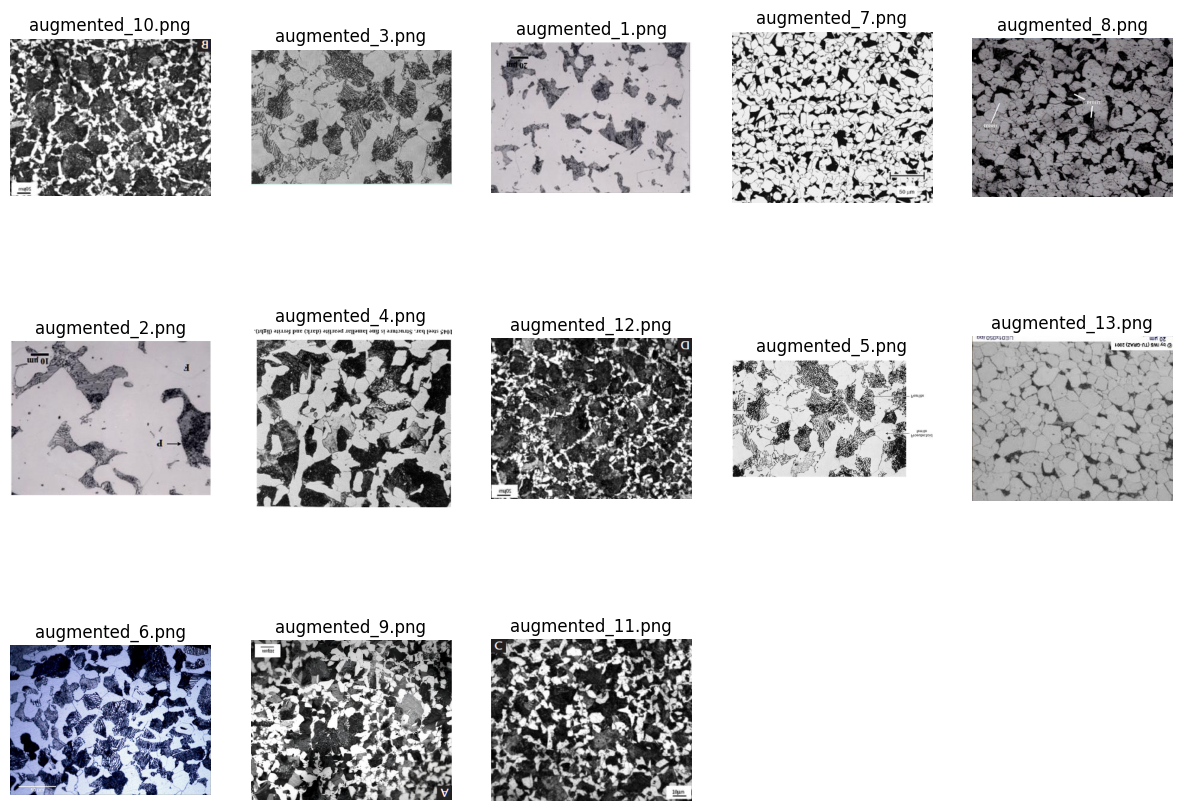

In [ ]:
# Display 20 sample images from the test directory
sample_images = random.sample(os.listdir(test_dir), min(20, len(os.listdir(test_dir))))

plt.figure(figsize=(15, 15))
for i, image_file in enumerate(sample_images):
    img_path = os.path.join(test_dir, image_file)
    img = plt.imread(img_path)
    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.title(image_file)
    plt.axis("off")

plt.show()

# Maske Oluşturma

In [ ]:
import os
import cv2
import json
import numpy as np

def get_image_size(image_path):
    """Görüntünün boyutlarını döndürür"""
    img = cv2.imread(image_path)
    if img is not None:
        return (img.shape[1], img.shape[0])  # (width, height)
    return None

def json_to_mask(json_path, image_size):
    with open(json_path, "r") as f:
        data = json.load(f)

    mask = np.zeros(image_size[::-1], dtype=np.uint8)  # (height, width) formatına çevir

    for item in data:
        if item["contentType"] == "polygon":
            label = item["labels"]["labelName"]
            points = np.array([(p["x"], p["y"]) for p in item["content"]], dtype=np.int32)

            if label.lower() == "perlit":
                color = 255
            else:
                color = 0

            cv2.fillPoly(mask, [points], color)

    return mask

def convert_all_json_to_masks(json_dir, save_dir, images_dir):
    """
    json_dir: Etiket dosyalarının bulunduğu dizin
    save_dir: Maskelerin kaydedileceği dizin
    images_dir: Orijinal görüntülerin bulunduğu dizin
    """
    os.makedirs(save_dir, exist_ok=True)

    for json_file in os.listdir(json_dir):
        if json_file.endswith(".json"):
            # İlgili görüntü dosyasının yolunu bul
            image_name = json_file.replace(".json", ".png")
            image_path = os.path.join(images_dir, image_name)

            # Görüntü boyutlarını al
            image_size = get_image_size(image_path)

            if image_size is None:
                print(f"Uyarı: {image_name} görüntüsü okunamadı, atlanıyor.")
                continue

            json_path = os.path.join(json_dir, json_file)
            mask = json_to_mask(json_path, image_size)

            mask_filename = json_file.replace(".json", ".png")
            mask_path = os.path.join(save_dir, mask_filename)

            cv2.imwrite(mask_path, mask)
            print(f"Maske oluşturuldu: {mask_filename} - Boyut: {image_size}")

# Mask klasörlerini oluştur
os.makedirs("dataset/masks/train", exist_ok=True)
os.makedirs("dataset/masks/val", exist_ok=True)

# Train için maske üret
convert_all_json_to_masks(
    json_dir="dataset/labels/train",
    save_dir="dataset/masks/train",
    images_dir="dataset/images/train"
)

# Validation için maske üret
convert_all_json_to_masks(
    json_dir="dataset/labels/val",
    save_dir="dataset/masks/val",
    images_dir="dataset/images/val"
)

# Oluşturulan maskelerin boyutlarını kontrol et
def check_sizes(images_dir, masks_dir):
    for img_name in os.listdir(images_dir):
        if img_name.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(images_dir, img_name)
            mask_path = os.path.join(masks_dir, img_name)

            if os.path.exists(mask_path):
                img = cv2.imread(img_path)
                mask = cv2.imread(mask_path, 0)  # Gri tonlamalı olarak oku

                print(f"{img_name}:")
                print(f"Görüntü boyutu: {img.shape}")
                print(f"Maske boyutu: {mask.shape}")
                print("------------------------")

print("Train görüntüleri ve maskeleri kontrol ediliyor:")
check_sizes("dataset/images/train", "dataset/masks/train")

print("\nValidation görüntüleri ve maskeleri kontrol ediliyor:")
check_sizes("dataset/images/val", "dataset/masks/val")

Maske oluşturuldu: perlit_3.png - Boyut: (385, 261)
Maske oluşturuldu: perlit_7.png - Boyut: (300, 257)
Maske oluşturuldu: perlit_11.png - Boyut: (322, 260)
Maske oluşturuldu: perlit_5.png - Boyut: (827, 491)
Maske oluşturuldu: perlit_13.png - Boyut: (292, 241)
Maske oluşturuldu: perlit_2.png - Boyut: (417, 323)
Maske oluşturuldu: perlit_12.png - Boyut: (320, 257)
Maske oluşturuldu: perlit_4.png - Boyut: (327, 293)
Maske oluşturuldu: perlit_10.png - Boyut: (322, 253)
Maske oluşturuldu: perlit_1.png - Boyut: (427, 320)
Maske oluşturuldu: perlit_9.png - Boyut: (644, 512)
Maske oluşturuldu: perlit_8.png - Boyut: (1879, 1488)
Maske oluşturuldu: perlit_6.png - Boyut: (1200, 900)
Train görüntüleri ve maskeleri kontrol ediliyor:
perlit_7.png:
Görüntü boyutu: (257, 300, 3)
Maske boyutu: (257, 300)
------------------------
perlit_3.png:
Görüntü boyutu: (261, 385, 3)
Maske boyutu: (261, 385)
------------------------
perlit_5.png:
Görüntü boyutu: (491, 827, 3)
Maske boyutu: (491, 827)
-----------

# Bağımlılıklar

In [ ]:
# Eğer çıktınız tek kanallı ise, normalizasyonu kaldırın veya ayarlayın
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()  # Normalizasyonu kaldırın
])

# Cihazı ayarla
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model Oluşturma


In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class UNet(nn.Module):
#     def __init__(self, in_channels=3, out_channels=1, base_channels=64):
#         super(UNet, self).__init__()

#         # Encoder (Downsampling) Katmanları
#         self.encoder1 = self._block(in_channels, base_channels)
#         self.encoder2 = self._block(base_channels, base_channels*2)
#         self.encoder3 = self._block(base_channels*2, base_channels*4)
#         self.encoder4 = self._block(base_channels*4, base_channels*8)

#         # Bottleneck
#         self.bottleneck = self._block(base_channels*8, base_channels*16)

#         # Decoder (Upsampling) Katmanları
#         self.upconv4 = nn.ConvTranspose2d(base_channels*16, base_channels*8, kernel_size=2, stride=2)
#         self.decoder4 = self._block(base_channels*16, base_channels*8)

#         self.upconv3 = nn.ConvTranspose2d(base_channels*8, base_channels*4, kernel_size=2, stride=2)
#         self.decoder3 = self._block(base_channels*8, base_channels*4)

#         self.upconv2 = nn.ConvTranspose2d(base_channels*4, base_channels*2, kernel_size=2, stride=2)
#         self.decoder2 = self._block(base_channels*4, base_channels*2)

#         self.upconv1 = nn.ConvTranspose2d(base_channels*2, base_channels, kernel_size=2, stride=2)
#         self.decoder1 = self._block(base_channels*2, base_channels)

#         # Final Convolutional Layer
#         self.final_conv = nn.Conv2d(base_channels, out_channels, kernel_size=1)

#         # Dropout ve Batch Normalization ekledik
#         self.dropout = nn.Dropout2d(0.1)

#     def _block(self, in_channels, out_channels):
#         return nn.Sequential(
#             nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False),
#             nn.BatchNorm2d(out_channels),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False),
#             nn.BatchNorm2d(out_channels),
#             nn.ReLU(inplace=True)
#         )

#     def forward(self, x):
#         # Encoder (Downsampling)
#         enc1 = self.encoder1(x)
#         enc2 = self.encoder2(F.max_pool2d(enc1, 2))
#         enc3 = self.encoder3(F.max_pool2d(enc2, 2))
#         enc4 = self.encoder4(F.max_pool2d(enc3, 2))

#         # Bottleneck
#         bottleneck = self.bottleneck(F.max_pool2d(enc4, 2))

#         # Decoder (Upsampling) with Skip Connections
#         dec4 = self.upconv4(bottleneck)
#         dec4 = torch.cat((dec4, enc4), dim=1)
#         dec4 = self.decoder4(dec4)
#         dec4 = self.dropout(dec4)

#         dec3 = self.upconv3(dec4)
#         dec3 = torch.cat((dec3, enc3), dim=1)
#         dec3 = self.decoder3(dec3)
#         dec3 = self.dropout(dec3)

#         dec2 = self.upconv2(dec3)
#         dec2 = torch.cat((dec2, enc2), dim=1)
#         dec2 = self.decoder2(dec2)
#         dec2 = self.dropout(dec2)

#         dec1 = self.upconv1(dec2)
#         dec1 = torch.cat((dec1, enc1), dim=1)
#         dec1 = self.decoder1(dec1)
#         dec1 = self.dropout(dec1)

#         # Final Convolution
#         return self.final_conv(dec1)

# # Ek performans artırıcı loss fonksiyonu
# class DiceLoss(nn.Module):
#     def __init__(self, weight=None, size_average=True):
#         super(DiceLoss, self).__init__()

#     def forward(self, inputs, targets, smooth=1):
#         inputs = torch.sigmoid(inputs)
#         inputs = inputs.view(-1)
#         targets = targets.view(-1)

#         intersection = (inputs * targets).sum()
#         dice_coefficient = (2. * intersection + smooth) / (inputs.sum() + targets.sum() + smooth)

#         return 1 - dice_coefficient

In [ ]:
# class UNet(nn.Module):
#     def __init__(self, in_channels=3, out_channels=1, base_channels=64):
#         super(UNet, self).__init__()

#         # Daha derin ve esnek katmanlar
#         self.encoder1 = self._block(in_channels, base_channels)
#         self.encoder2 = self._block(base_channels, base_channels*2)
#         self.encoder3 = self._block(base_channels*2, base_channels*4)
#         self.encoder4 = self._block(base_channels*4, base_channels*8)

#         # Orta katman
#         self.bottleneck = self._block(base_channels*8, base_channels*16)

#         # Decoder katmanları
#         self.upconv4 = nn.ConvTranspose2d(base_channels*16, base_channels*8, kernel_size=2, stride=2)
#         self.decoder4 = self._block(base_channels*16, base_channels*8)

#         # Diğer decoder katmanları benzer şekilde devam eder...

#         self.final_conv = nn.Conv2d(base_channels, out_channels, kernel_size=1)

#     def _block(self, in_channels, out_channels):
#         return nn.Sequential(
#             nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
#             nn.BatchNorm2d(out_channels),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
#             nn.BatchNorm2d(out_channels),
#             nn.ReLU(inplace=True)
#         )

#     def forward(self, x):
#         # Encoder
#         enc1 = self.encoder1(x)
#         enc2 = self.encoder2(F.max_pool2d(enc1, 2))
#         enc3 = self.encoder3(F.max_pool2d(enc2, 2))
#         enc4 = self.encoder4(F.max_pool2d(enc3, 2))

#         # Bottleneck
#         bottleneck = self.bottleneck(F.max_pool2d(enc4, 2))

#         # Decoder
#         dec4 = self.upconv4(bottleneck)
#         dec4 = torch.cat((dec4, enc4), dim=1)
#         dec4 = self.decoder4(dec4)

#         # Diğer decoder adımları...

#         return self.final_conv(dec4)

In [ ]:
class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super(UNet, self).__init__()

        def conv_block(in_c, out_c):
            return nn.Sequential(
                nn.Conv2d(in_c, out_c, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_c, out_c, kernel_size=3, padding=1),
                nn.ReLU(inplace=True)
            )

        self.encoder1 = conv_block(in_channels, 64)
        self.encoder2 = conv_block(64, 128)
        self.encoder3 = conv_block(128, 256)

        self.pool = nn.MaxPool2d(2, 2)

        self.bottleneck = conv_block(256, 512)

        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.decoder3 = conv_block(512, 256)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.decoder2 = conv_block(256, 128)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder1 = conv_block(128, 64)

        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool(enc1))
        enc3 = self.encoder3(self.pool(enc2))

        bottleneck = self.bottleneck(self.pool(enc3))

        dec3 = self.decoder3(torch.cat([self.upconv3(bottleneck), enc3], dim=1))
        dec2 = self.decoder2(torch.cat([self.upconv2(dec3), enc2], dim=1))
        dec1 = self.decoder1(torch.cat([self.upconv1(dec2), enc1], dim=1))

        output = self.final_conv(dec1)
        return output


In [ ]:
class MetalDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_filenames = sorted(os.listdir(image_dir))

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_filenames[idx])
        mask_path = os.path.join(self.mask_dir, self.image_filenames[idx].replace(".png", ".png"))  # Aynı isimde olmalı!

        image = Image.open(img_path).convert("RGB")  # Görüntüyü yükle
        mask = Image.open(mask_path).convert("L")  # Tek kanal (Siyah-Beyaz)

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        mask = torch.where(mask > 0.5, 1, 0)  # Binary maskeye çevir (0 ve 1)

        return image, mask


In [ ]:
# Hiperparametreler
num_epochs = 100
batch_size = 4
learning_rate = 0.0001

# Veri setlerini ve veri yükleyicileri oluştur
train_dataset = MetalDataset("dataset/images/train", "dataset/masks/train", transform=transform)
val_dataset = MetalDataset("dataset/images/val", "dataset/masks/val", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
# Modeli oluştur ve cihaza taşı
model = UNet(in_channels=3, out_channels=1).to(device)

# Kayıp fonksiyonu ve optimizasyon
criterion = nn.BCEWithLogitsLoss()  # Binary segmentation için uygun
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# class CombinedLoss(nn.Module):
#     def __init__(self, bce_weight=0.5, dice_weight=0.5):
#         super(CombinedLoss, self).__init__()
#         self.bce_loss = nn.BCEWithLogitsLoss()
#         self.dice_loss = DiceLoss()
#         self.bce_weight = bce_weight
#         self.dice_weight = dice_weight

#     def forward(self, inputs, targets):
#         bce = self.bce_loss(inputs, targets)
#         dice = self.dice_loss(inputs, targets)

#         # İki kaybı ağırlıklandırarak birleştirin
#         return self.bce_weight * bce + self.dice_weight * dice

# # Eğitim fonksiyonunu güncelleyin
# def train_model(model, train_loader, val_loader, device, num_epochs=100):
#     # Kombine kayıp fonksiyonu
#     criterion = CombinedLoss()
#     optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#     scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)

#     model.to(device)

#     for epoch in range(num_epochs):
#         model.train()
#         total_train_loss = 0

#         for images, masks in train_loader:
#             images = images.to(device)
#             masks = masks.to(device).float()

#             optimizer.zero_grad()

#             # Forward pass
#             outputs = model(images)

#             # Boyut kontrolü
#             if outputs.dim() == 3:
#                 outputs = outputs.unsqueeze(1)

#             # Loss hesaplama
#             loss = criterion(outputs, masks)

#             # Backward ve optimize
#             loss.backward()
#             optimizer.step()

#             total_train_loss += loss.item()

#         # Ortalama loss
#         avg_train_loss = total_train_loss / len(train_loader)

#         # Learning rate scheduler
#         scheduler.step(avg_train_loss)

#         print(f"Epoch {epoch+1}, Loss: {avg_train_loss:.4f}")

#     return model

In [ ]:
# def train_model(model, train_loader, val_loader, device):
#     # Çoklu kayıp fonksiyonu
#     criterion = nn.BCEWithLogitsLoss() + DiceLoss()
#     optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#     scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5)

#     model.to(device)

#     for epoch in range(num_epochs):
#         model.train()
#         total_train_loss = 0

#         for images, masks in train_loader:
#             images = images.to(device)
#             masks = masks.to(device).float()

#             optimizer.zero_grad()

#             # Forward pass
#             outputs = model(images)

#             # Boyut kontrolü
#             if outputs.dim() == 3:
#                 outputs = outputs.unsqueeze(1)

#             # Loss hesaplama
#             loss = criterion(outputs, masks)

#             # Backward ve optimize
#             loss.backward()
#             optimizer.step()

#             total_train_loss += loss.item()

#         # Ortalama loss
#         avg_train_loss = total_train_loss / len(train_loader)

#         # Learning rate scheduler
#         scheduler.step(avg_train_loss)

#         print(f"Epoch {epoch+1}, Loss: {avg_train_loss:.4f}")

#     return model

In [ ]:
# def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25):
#     model.train()

#     for epoch in range(num_epochs):
#         running_loss = 0.0

#         for images, masks in train_loader:
#             images, masks = images.to(device), masks.to(device).float()

#             optimizer.zero_grad()
#             outputs = model(images)

#             # Çıktıyı düzenleme
#             if outputs.dim() == 3:
#                 outputs = outputs.unsqueeze(1)  # Boyutu [B, 1, H, W] haline getirin

#             loss = criterion(outputs, masks)
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()

#         print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

#     print("Eğitim tamamlandı!")

In [ ]:
# def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25):
#     model.train()

#     for epoch in range(num_epochs):
#         running_loss = 0.0

#         for images, masks in train_loader:
#             images, masks = images.to(device), masks.to(device).float()  # Maskeleri float yap

#             optimizer.zero_grad()
#             outputs = model(images)  # (B, 1, H, W) → (B, H, W)  kaldirildi .squeeze(1) cikti sikistiriyor

#             loss = criterion(outputs, masks)  # BCEWithLogitsLoss kullandığımız için maskeler float olmalı
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()

#         print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

#     print("Eğitim tamamlandı!")


In [ ]:
# train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=num_epochs)

Epoch 1/100, Loss: 0.6957449316978455
Epoch 2/100, Loss: 0.6921446323394775
Epoch 3/100, Loss: 0.6868650019168854
Epoch 4/100, Loss: 0.6820367872714996
Epoch 5/100, Loss: 0.6810530126094818
Epoch 6/100, Loss: 0.6734378933906555
Epoch 7/100, Loss: 0.6649269461631775
Epoch 8/100, Loss: 0.6634642779827118
Epoch 9/100, Loss: 0.6566134095191956
Epoch 10/100, Loss: 0.6413606405258179
Epoch 11/100, Loss: 0.6324172019958496
Epoch 12/100, Loss: 0.6028455793857574
Epoch 13/100, Loss: 0.5800474286079407
Epoch 14/100, Loss: 0.5933557152748108
Epoch 15/100, Loss: 0.580481231212616
Epoch 16/100, Loss: 0.6023698151111603
Epoch 17/100, Loss: 0.5361992865800858
Epoch 18/100, Loss: 0.5901154279708862
Epoch 19/100, Loss: 0.551051527261734
Epoch 20/100, Loss: 0.5139089226722717
Epoch 21/100, Loss: 0.5402046144008636
Epoch 22/100, Loss: 0.5318012833595276
Epoch 23/100, Loss: 0.5197193026542664
Epoch 24/100, Loss: 0.5183505415916443
Epoch 25/100, Loss: 0.5015029162168503
Epoch 26/100, Loss: 0.48434644937515

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torchvision.transforms as transforms
# from torch.utils.data import DataLoader, Dataset
# import os
# from PIL import Image

# class UNet(nn.Module):
#     def __init__(self, in_channels=3, out_channels=1):
#         super(UNet, self).__init__()

#         def conv_block(in_c, out_c):
#             return nn.Sequential(
#                 nn.Conv2d(in_c, out_c, kernel_size=3, padding=1),
#                 nn.BatchNorm2d(out_c),
#                 nn.LeakyReLU(inplace=True),
#                 nn.Conv2d(out_c, out_c, kernel_size=3, padding=1),
#                 nn.BatchNorm2d(out_c),
#                 nn.LeakyReLU(inplace=True),
#                 nn.Dropout(0.3)
#             )

#         self.encoder1 = conv_block(in_channels, 64)
#         self.encoder2 = conv_block(64, 128)
#         self.encoder3 = conv_block(128, 256)

#         self.pool = nn.MaxPool2d(2, 2)

#         self.bottleneck = conv_block(256, 512)

#         self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
#         self.decoder3 = conv_block(512, 256)
#         self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
#         self.decoder2 = conv_block(256, 128)
#         self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
#         self.decoder1 = conv_block(128, 64)

#         self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

#     def forward(self, x):
#         enc1 = self.encoder1(x)
#         enc2 = self.encoder2(self.pool(enc1))
#         enc3 = self.encoder3(self.pool(enc2))

#         bottleneck = self.bottleneck(self.pool(enc3))

#         dec3 = self.decoder3(torch.cat([self.upconv3(bottleneck), enc3], dim=1))
#         dec2 = self.decoder2(torch.cat([self.upconv2(dec3), enc2], dim=1))
#         dec1 = self.decoder1(torch.cat([self.upconv1(dec2), enc1], dim=1))

#         output = self.final_conv(dec1)
#         return output

# class MetalDataset(Dataset):
#     def __init__(self, image_dir, mask_dir, image_transform=None, mask_transform=None):
#         self.image_dir = image_dir
#         self.mask_dir = mask_dir
#         self.image_transform = image_transform
#         self.mask_transform = mask_transform
#         self.image_filenames = sorted(os.listdir(image_dir))

#     def __len__(self):
#         return len(self.image_filenames)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.image_dir, self.image_filenames[idx])
#         mask_path = os.path.join(self.mask_dir, self.image_filenames[idx].replace(".png", ".png"))

#         image = Image.open(img_path).convert("RGB")
#         mask = Image.open(mask_path).convert("L")

#         if self.image_transform:
#             image = self.image_transform(image)
#         if self.mask_transform:
#             mask = self.mask_transform(mask)

#         mask = torch.where(mask > 0.5, torch.tensor(1, dtype=torch.float32), torch.tensor(0, dtype=torch.float32))
#         mask = mask.unsqueeze(0)

#         return image, mask

# # Hiperparametreler
# num_epochs = 100
# batch_size = 4
# learning_rate = 0.0001

# # Transformlar
# data_transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
# ])
# mask_transform = transforms.Compose([
#     transforms.ToTensor()
# ])

# # Veri setlerini ve veri yükleyicileri oluştur
# train_dataset = MetalDataset("dataset/images/train", "dataset/masks/train", image_transform=data_transform, mask_transform=mask_transform)
# val_dataset = MetalDataset("dataset/images/val", "dataset/masks/val", image_transform=data_transform, mask_transform=mask_transform)

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# # Modeli oluştur ve cihaza taşı
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = UNet(in_channels=3, out_channels=1).to(device)

# # Kayıp fonksiyonu ve optimizasyon
# criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)


# Modeli Çalıştırılması

Validation: 100%|██████████| 2/2 [00:00<00:00,  4.77batch/s, val_loss=0.67]


Epoch 1/100
Train Loss: 0.6214, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  4.94batch/s, val_loss=0.67]


Epoch 2/100
Train Loss: 0.6222, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  4.87batch/s, val_loss=0.67]


Epoch 3/100
Train Loss: 0.6289, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  5.05batch/s, val_loss=0.67]


Epoch 4/100
Train Loss: 0.6378, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.48batch/s, val_loss=0.67]


Epoch 5/100
Train Loss: 0.6314, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.42batch/s, val_loss=0.67]


Epoch 6/100
Train Loss: 0.6361, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.03batch/s, val_loss=0.67]


Epoch 7/100
Train Loss: 0.6428, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  5.63batch/s, val_loss=0.67]


Epoch 8/100
Train Loss: 0.6214, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.37batch/s, val_loss=0.67]


Epoch 9/100
Train Loss: 0.6354, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.43batch/s, val_loss=0.67]


Epoch 10/100
Train Loss: 0.6428, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.34batch/s, val_loss=0.67]


Epoch 11/100
Train Loss: 0.6247, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.34batch/s, val_loss=0.67]


Epoch 12/100
Train Loss: 0.6492, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.37batch/s, val_loss=0.67]


Epoch 13/100
Train Loss: 0.6353, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.12batch/s, val_loss=0.67]


Epoch 14/100
Train Loss: 0.6428, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.41batch/s, val_loss=0.67]


Epoch 15/100
Train Loss: 0.6247, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.25batch/s, val_loss=0.67]


Epoch 16/100
Train Loss: 0.6452, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.13batch/s, val_loss=0.67]


Epoch 17/100
Train Loss: 0.6314, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.47batch/s, val_loss=0.67]


Epoch 18/100
Train Loss: 0.6222, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.19batch/s, val_loss=0.67]


Epoch 19/100
Train Loss: 0.6353, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.51batch/s, val_loss=0.67]


Epoch 20/100
Train Loss: 0.6329, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  4.87batch/s, val_loss=0.67]


Epoch 21/100
Train Loss: 0.6329, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  4.78batch/s, val_loss=0.67]


Epoch 22/100
Train Loss: 0.6222, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  4.83batch/s, val_loss=0.67]


Epoch 23/100
Train Loss: 0.6361, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  4.87batch/s, val_loss=0.67]


Epoch 24/100
Train Loss: 0.6378, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  5.86batch/s, val_loss=0.67]


Epoch 25/100
Train Loss: 0.6385, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.40batch/s, val_loss=0.67]


Epoch 26/100
Train Loss: 0.6247, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.43batch/s, val_loss=0.67]


Epoch 27/100
Train Loss: 0.6222, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.11batch/s, val_loss=0.67]


Epoch 28/100
Train Loss: 0.6354, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.43batch/s, val_loss=0.67]


Epoch 29/100
Train Loss: 0.6378, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.11batch/s, val_loss=0.67]


Epoch 30/100
Train Loss: 0.6378, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.37batch/s, val_loss=0.67]


Epoch 31/100
Train Loss: 0.6361, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.24batch/s, val_loss=0.67]


Epoch 32/100
Train Loss: 0.6354, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.06batch/s, val_loss=0.67]


Epoch 33/100
Train Loss: 0.6378, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.42batch/s, val_loss=0.67]


Epoch 34/100
Train Loss: 0.6329, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.43batch/s, val_loss=0.67]


Epoch 35/100
Train Loss: 0.6289, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.34batch/s, val_loss=0.67]


Epoch 36/100
Train Loss: 0.6492, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.51batch/s, val_loss=0.67]


Epoch 37/100
Train Loss: 0.6353, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.22batch/s, val_loss=0.67]


Epoch 38/100
Train Loss: 0.6289, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.47batch/s, val_loss=0.67]


Epoch 39/100
Train Loss: 0.6214, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  6.34batch/s, val_loss=0.67]


Epoch 40/100
Train Loss: 0.6361, Validation Loss: 0.6738


Validation: 100%|██████████| 2/2 [00:00<00:00,  5.13batch/s, val_loss=0.67]


Epoch 41/100
Train Loss: 0.6222, Validation Loss: 0.6738
Early stopping triggered after 41 epochs


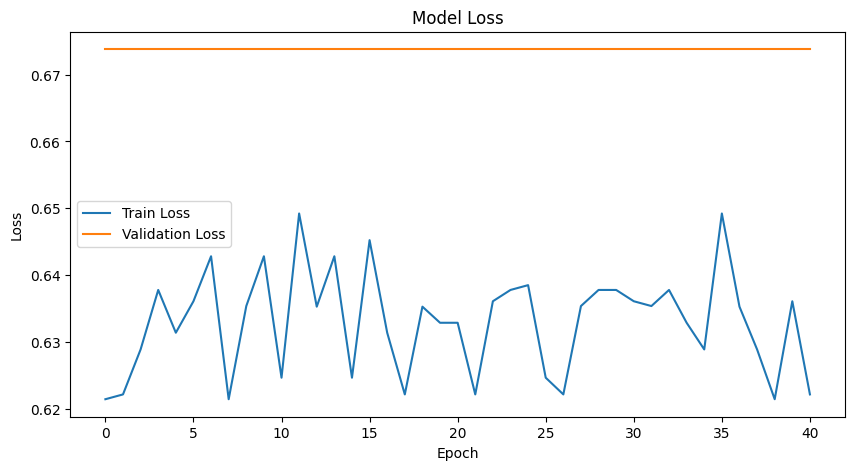

In [ ]:
import torch
import numpy as np
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm

def train_model(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    device,
    num_epochs=25,
    scheduler=None,
    early_stopping_patience=7,
    log_dir='runs/experiment'
):
    # TensorBoard Writer
    writer = SummaryWriter(log_dir)

    # Erken durdurma için değişkenler
    best_val_loss = float('inf')
    patience_counter = 0

    # Eğitim ve validasyon için istatistik tutucular
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        # Eğitim modu
        model.train()
        running_train_loss = 0.0

        # Progress bar
        train_progress = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch')

        for images, masks in train_progress:
            # Cihaza taşıma ve float'a çevirme
            images = images.to(device)
            masks = masks.to(device).float()

            # Gradyanları sıfırlama
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)

            # Boyut kontrolü ve düzenleme
            if outputs.dim() == 3:
                outputs = outputs.unsqueeze(1)

            # Loss hesaplama
            loss = criterion(outputs, masks)

            # Backward pass ve optimizasyon
            loss.backward()
            optimizer.step()

            # Loss değerini kaydetme
            running_train_loss += loss.item()

            # Progress bar güncelleme
            train_progress.set_postfix({'loss': loss.item()})

        # Ortalama train loss
        avg_train_loss = running_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validasyon
        model.eval()
        running_val_loss = 0.0

        with torch.no_grad():
            val_progress = tqdm(val_loader, desc='Validation', unit='batch')
            for val_images, val_masks in val_progress:
                val_images = val_images.to(device)
                val_masks = val_masks.to(device).float()

                val_outputs = model(val_images)

                # Boyut kontrolü
                if val_outputs.dim() == 3:
                    val_outputs = val_outputs.unsqueeze(1)

                val_loss = criterion(val_outputs, val_masks)
                running_val_loss += val_loss.item()

                val_progress.set_postfix({'val_loss': val_loss.item()})

        # Ortalama validation loss
        avg_val_loss = running_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        # Learning rate scheduler
        if scheduler:
            scheduler.step(avg_val_loss)

        # TensorBoard'a loss değerlerini kaydetme
        writer.add_scalar('Loss/train', avg_train_loss, epoch)
        writer.add_scalar('Loss/validation', avg_val_loss, epoch)

        # Model checkpointing ve erken durdurma
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0

            # En iyi modeli kaydetme
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'train_loss': avg_train_loss,
                'val_loss': avg_val_loss
            }, 'best_model.pth')
        else:
            patience_counter += 1

        # Konsola loss bilgilerini yazdırma
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

        # Erken durdurma
        if patience_counter >= early_stopping_patience:
            print(f"Early stopping triggered after {epoch+1} epochs")
            break

    # TensorBoard writer'ı kapatma
    writer.close()

    # Loss history'sini döndürme
    return {
        'train_losses': train_losses,
        'val_losses': val_losses
    }

# Kullanım örneği
# Gerekli kütüphaneleri import etmeyi unutmayın
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)
loss_history = train_model(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    device,
    num_epochs=100,
    scheduler=scheduler,
    early_stopping_patience=40
)

# Loss history'sini görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(loss_history['train_losses'], label='Train Loss')
plt.plot(loss_history['val_losses'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Model Kaydetme

In [ ]:
import shutil
import os

# Kaynak ve hedef dosya yolları
kaynak_dosya = "/content/best_model.pth"
hedef_dosya = "/content/drive/MyDrive/Goruntu_Isleme/Model/Unet/unet_perlit_v3.pth"

# Dosyayı kopyala
shutil.copy2(kaynak_dosya, hedef_dosya)

print(f"{kaynak_dosya} dosyası {hedef_dosya} olarak kaydedildi.")

/content/best_model.pth dosyası /content/drive/MyDrive/Goruntu_Isleme/Model/Unet/unet_perlit_v3.pth olarak kaydedildi.


# Modeli Yükleme

In [ ]:
import torch

def load_model(model_path, device):
    # Model örneğini oluştur. UNet sınıfınızın tanımını buraya ekleyin.
    model = UNet()

    # Modeli cihaza taşı
    model = model.to(device)

    # Kaydedilmiş model ağırlıklarını yükle
    checkpoint = torch.load(model_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict']) # Sadece model ağırlıklarını yükle

    return model


# Modeli yükle
model_path = "/content/drive/MyDrive/Goruntu_Isleme/Model/Unet/unet_perlit_v2.pth"
model = load_model(model_path, device)


# Predict and Save

In [ ]:
def predict(image_path, model, transform, device):
    model.eval()

    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image).squeeze(0).cpu().numpy()
        mask = (output > 0).astype(np.uint8)  # Sigmoid aktivasyonu uygula

    return mask


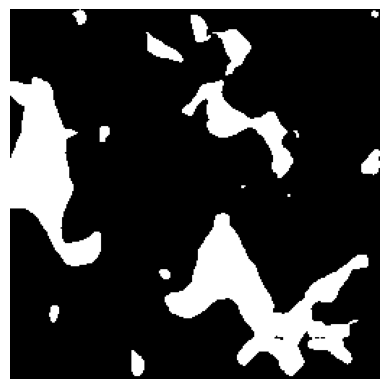

In [ ]:
import matplotlib.pyplot as plt

mask = predict("dataset/images/train/perlit_2.png", model, transform, device)
mask = (mask * 255).astype(np.uint8)
mask = mask.squeeze()  # (1, 128, 128) -> (128, 128)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch

def predict_and_save_masks(image_dir, results_dir, model, transform, device):
    # Results klasörünü oluştur
    os.makedirs(results_dir, exist_ok=True)

    # Görüntüleri al
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

    for image_file in image_files:
        # Görüntü yolunu oluştur
        image_path = os.path.join(image_dir, image_file)

        try:
            # Maskeyi tahmin et
            mask = predict(image_path, model, transform, device)

            # Maskeyi 0-255 aralığına ölçekle
            mask = (mask * 255).astype(np.uint8)

            # Boyut düzeltmesi
            mask = mask.squeeze()  # (1, 128, 128) -> (128, 128)

            # Maskeyi kaydet
            result_mask_path = os.path.join(results_dir, f'mask_{image_file}')
            cv2.imwrite(result_mask_path, mask)

            print(f"Mask kaydedildi: {result_mask_path}")

        except Exception as e:
            print(f"Hata oluştu {image_file}: {e}")

# Klasör yolları
train_images_dir = "dataset/images/train"
val_images_dir = "dataset/images/val"
results_dir = "results"

# Train görüntüleri için mask oluşturma
predict_and_save_masks(train_images_dir, results_dir, model, transform, device)

# Validation görüntüleri için mask oluşturma
predict_and_save_masks(val_images_dir, results_dir, model, transform, device)

Mask kaydedildi: results/mask_perlit_7.png
Mask kaydedildi: results/mask_perlit_3.png
Mask kaydedildi: results/mask_perlit_5.png
Mask kaydedildi: results/mask_perlit_13.png
Mask kaydedildi: results/mask_perlit_11.png
Mask kaydedildi: results/mask_perlit_2.png
Mask kaydedildi: results/mask_perlit_8.png
Mask kaydedildi: results/mask_perlit_4.png
Mask kaydedildi: results/mask_perlit_6.png
Mask kaydedildi: results/mask_perlit_1.png
Mask kaydedildi: results/mask_perlit_10.png
Mask kaydedildi: results/mask_perlit_9.png
Mask kaydedildi: results/mask_perlit_12.png


In [ ]:
print(f"Mask Type: {type(mask)}, Mask Shape: {mask.shape}, Mask Dtype: {mask.dtype}")

Mask Type: <class 'numpy.ndarray'>, Mask Shape: (256, 256), Mask Dtype: uint8


# Çizim

In [ ]:
# prompt: result klasörünü sil

import shutil
import os

result_folder_path = '/content/painted'

if os.path.exists(result_folder_path):
  shutil.rmtree(result_folder_path)
  print(f"Klasör '{result_folder_path}' silindi.")
else:
  print(f"Klasör '{result_folder_path}' zaten mevcut değil.")


Klasör '/content/painted' silindi.


In [ ]:
import json
import os
import numpy as np
import cv2

def normalize_points(content, original_width, original_height, target_width=256, target_height=256):
    # Koordinatları normalize et
    normalized_points = [
        {
            'x': (point['x'] / original_width) * target_width,
            'y': (point['y'] / original_height) * target_height
        } for point in content
    ]

    return normalized_points

def plot_and_save_images(results_dir, labels_dirs, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    # Results klasöründeki mask dosyalarını al
    mask_files = [f for f in os.listdir(results_dir) if f.startswith("mask_perlit_") and f.endswith(".png")]

    # Tüm label dizinlerini birleştir
    all_labels = {}
    for labels_dir in labels_dirs:
        for label_file in os.listdir(labels_dir):
            if label_file.endswith('.json'):
                all_labels[label_file] = os.path.join(labels_dir, label_file)

    for mask_file in mask_files:
        # Mask dosyasının orijinal görüntü adını bul
        image_name = mask_file.replace("mask_", "")
        json_file = f"{os.path.splitext(image_name)[0]}.json"

        # JSON dosyasının yolunu bul
        json_path = all_labels.get(json_file)
        if not json_path:
            print(f"JSON file not found for {mask_file}")
            continue

        # Maskeyi 256x256 olarak yükle
        mask_path = os.path.join(results_dir, mask_file)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (256, 256), interpolation=cv2.INTER_LINEAR)
        mask_height, mask_width = mask.shape

        # Maskeyi renkli görüntüye çevir
        mask_color = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

        # JSON verilerini oku
        with open(json_path, "r") as f:
            data = json.load(f)

        # Orijinal görüntü boyutlarını al
        original_image_path = os.path.join("dataset/images/train", image_name)
        if not os.path.exists(original_image_path):
            original_image_path = os.path.join("dataset/images/val", image_name)

        original_image = cv2.imread(original_image_path)
        original_height, original_width, _ = original_image.shape

        for item in data:
            content = item["content"]
            label_color_rgb = tuple(map(int, item["labels"]["labelColorRGB"].split(",")))

            # Noktaları normalize et
            normalized_points = normalize_points(content, original_width, original_height)

            # Noktaları tam sayıya çevir
            points = [
                (int(point["x"]), int(point["y"]))
                for point in normalized_points
            ]

            # Görüntü sınırları içinde kalan noktaları filtrele
            points = [
                point for point in points
                if 0 <= point[0] < mask_width and 0 <= point[1] < mask_height
            ]

            # Yeterli sayıda nokta varsa polygon oluştur
            if len(points) >= 3:
                polygon = np.array(points, np.int32)
                polygon = polygon.reshape((-1, 1, 2))

                # Overlay oluştur
                overlay = mask_color.copy()

                # Alanı doldur
                cv2.fillPoly(overlay, [polygon], color=label_color_rgb)

                # Kenarları çiz
                cv2.polylines(overlay, [polygon], isClosed=True, color=label_color_rgb, thickness=2)

                # Overlay'i ana görüntüye yarı şeffaf olarak ekle
                cv2.addWeighted(overlay, 0.5, mask_color, 1 - 0.5, 0, mask_color)

        # Kaydetme
        output_path = os.path.join(output_dir, mask_file)
        cv2.imwrite(output_path, mask_color)
        print(f"Saved: {output_path}")

# Klasör yolları
results_dir = "results"
dataset_labels_dirs = [
    "dataset/labels/train",
    "dataset/labels/val"
]
output_dir = "painted"

# Tüm label dizinlerinden işlem yap
plot_and_save_images(results_dir, dataset_labels_dirs, output_dir)

Saved: painted/mask_perlit_4.png
Saved: painted/mask_perlit_6.png
Saved: painted/mask_perlit_8.png
Saved: painted/mask_perlit_13.png
Saved: painted/mask_perlit_11.png
Saved: painted/mask_perlit_10.png
Saved: painted/mask_perlit_2.png
Saved: painted/mask_perlit_12.png
Saved: painted/mask_perlit_1.png
Saved: painted/mask_perlit_9.png
Saved: painted/mask_perlit_5.png
Saved: painted/mask_perlit_3.png
Saved: painted/mask_perlit_7.png


# color_analsis

In [ ]:
# prompt: color_analsis klasörünü sil

import shutil

# color_analsis klasörünü sil
if os.path.exists("color_analysis"):
  shutil.rmtree("color_analysis")
  print("color_analsis klasörü silindi.")
else:
  print("color_analsis klasörü zaten mevcut değil.")


color_analsis klasörü silindi.


In [ ]:
import os
import json
import cv2
import numpy as np

def analyze_color_intensity(painted_dir, output_dir):
    # Output dizinini oluştur
    os.makedirs(output_dir, exist_ok=True)

    # Painted klasöründeki tüm görüntüleri al
    painted_images = [f for f in os.listdir(painted_dir) if f.startswith('mask_') and f.endswith('.png')]

    for image_file in painted_images:
        # Görüntüyü yükle
        image_path = os.path.join(painted_dir, image_file)
        image = cv2.imread(image_path)

        # Toplam piksel sayısını hesapla
        total_pixels = image.shape[0] * image.shape[1]

        # Renk yoğunluklarını hesapla
        dark_blue_mask = np.all(image == [128, 0, 0], axis=-1)
        light_blue_mask = np.all(image == [255, 128, 128], axis=-1)
        black_mask = np.all(image == [0, 0, 0], axis=-1)
        white_mask = np.all(image == [255, 255, 255], axis=-1)

        # Piksel sayılarını hesapla
        dark_blue_pixels = np.sum(dark_blue_mask)
        light_blue_pixels = np.sum(light_blue_mask)
        black_pixels = np.sum(black_mask)
        white_pixels = np.sum(white_mask)

        # Yüzde hesaplamaları
        dark_blue_percentage = (dark_blue_pixels / total_pixels) * 100
        light_blue_percentage = (light_blue_pixels / total_pixels) * 100
        black_percentage = (black_pixels / total_pixels) * 100
        white_percentage = (white_pixels / total_pixels) * 100

        # True/False oranını hesapla
        total_blue_pixels = dark_blue_pixels + light_blue_pixels + white_pixels
        true_blue_percentage = 0

        if total_blue_pixels > 0:
            true_blue_percentage = (light_blue_pixels / total_blue_pixels) * 100

        # Etiket oluştur
        color_label = {
            "filename": image_file,
            "total_pixels": int(total_pixels),
            "color_intensities": {
                "dark_blue": {
                    "color": [128, 0, 0],
                    "pixel_count": int(dark_blue_pixels),
                    "percentage": round(dark_blue_percentage, 2),
                    "status": "false"
                },
                "light_blue": {
                    "color": [255, 128, 128],
                    "pixel_count": int(light_blue_pixels),
                    "percentage": round(light_blue_percentage, 2),
                    "status": "true"
                },
                "black": {
                    "color": [0, 0, 0],
                    "pixel_count": int(black_pixels),
                    "percentage": round(black_percentage, 2),
                    "status": "empty"
                }
            },
            "evaluation": {
                "dominant_color": max(
                    [
                        ("dark_blue", dark_blue_percentage),
                        ("light_blue", light_blue_percentage),
                        ("black", black_percentage)
                    ],
                    key=lambda x: x[1]
                )[0],
                "true_blue_percentage": round(true_blue_percentage, 2)
            }
        }

        # JSON dosyasına kaydet
        output_json_path = os.path.join(output_dir, f"{os.path.splitext(image_file)[0]}_color_analysis.json")
        with open(output_json_path, 'w') as f:
            json.dump(color_label, f, indent=4)

        print(f"Analiz tamamlandı: {image_file}")

# Klasör yolları
painted_dir = "painted"
output_dir = "color_analysis"

# Analiz fonksiyonunu çağır
analyze_color_intensity(painted_dir, output_dir)

Analiz tamamlandı: mask_perlit_4.png
Analiz tamamlandı: mask_perlit_6.png
Analiz tamamlandı: mask_perlit_8.png
Analiz tamamlandı: mask_perlit_13.png
Analiz tamamlandı: mask_perlit_11.png
Analiz tamamlandı: mask_perlit_10.png
Analiz tamamlandı: mask_perlit_2.png
Analiz tamamlandı: mask_perlit_12.png
Analiz tamamlandı: mask_perlit_1.png
Analiz tamamlandı: mask_perlit_9.png
Analiz tamamlandı: mask_perlit_5.png
Analiz tamamlandı: mask_perlit_3.png
Analiz tamamlandı: mask_perlit_7.png


# Gösterim

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Test klasörlerinin yollarını belirleyin
train_dir = "dataset/images/train"
val_dir = "dataset/images/val"

# Her iki klasördeki görüntüleri birleştir
train_images = [f for f in os.listdir(train_dir) if f.endswith('.png')]
val_images = [f for f in os.listdir(val_dir) if f.endswith('.png')]
test_images = train_images + val_images

# Her görüntü için 3 sütun (orijinal, maske ve painted) olacak şekilde düzenle
n_images = len(test_images)
n_rows = n_images  # Her görüntü için bir satır
n_cols = 3         # Her satırda 3 sütun (orijinal, maske ve painted)

# Grafik boyutunu ayarlayın
plt.figure(figsize=(15, 5*n_rows))

for idx, image_name in enumerate(test_images):
    # Görüntünün hangi klasörde olduğunu belirle
    if image_name in train_images:
        image_dir = train_dir
    else:
        image_dir = val_dir

    # Orijinal görüntüyü yükle
    image_path = os.path.join(image_dir, image_name)
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Maskeyi results klasöründen yükle
    mask_path = os.path.join('results', f'mask_{image_name}')
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Painted görüntüyü yükle
    painted_path = os.path.join('painted', f'mask_{image_name}')

    # Eğer mask_ önekli dosya yoksa, normal dosya adını dene
    if not os.path.exists(painted_path):
        painted_path = os.path.join('painted', image_name)

    # Görüntüyü yükle
    painted_image = cv2.imread(painted_path)

    # Eğer görüntü hala bulunamadıysa, boş bir görüntü oluştur
    if painted_image is None:
        print(f"Painted image not found for {image_name}")
        painted_image = np.zeros_like(original_image)

    painted_image = cv2.cvtColor(painted_image, cv2.COLOR_BGR2RGB)

    # Color analysis JSON dosyasını oku
    color_analysis_path = os.path.join('color_analysis', f'mask_{image_name.split(".")[0]}_color_analysis.json')

    # Varsayılan true blue percentage
    true_blue_percentage = "N/A"

    try:
        with open(color_analysis_path, 'r') as f:
            color_analysis = json.load(f)
            true_blue_percentage = color_analysis['evaluation']['true_blue_percentage']
    except FileNotFoundError:
        print(f"Color analysis not found for {image_name}")

    # Orijinal görüntüyü göster
    plt.subplot(n_rows, n_cols, 3*idx + 1)
    plt.imshow(original_image)
    plt.title(f'Original: {image_name}')
    plt.axis('off')

    # Maskeyi göster
    plt.subplot(n_rows, n_cols, 3*idx + 2)
    plt.imshow(mask, cmap='gray')
    plt.title(f'Mask: {image_name}')
    plt.axis('off')

    # Painted görüntüyü göster
    plt.subplot(n_rows, n_cols, 3*idx + 3)
    plt.imshow(painted_image)
    plt.title(f'Painted: {image_name}\nDoğruluk: {true_blue_percentage}%')
    plt.axis('off')

# Grafikler arasında boşluk bırak
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/images/train'